# Preparing environment

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.6 MB/s eta 0:00:00


In [ ]:
!pip show transformers

Name: transformers
Version: 4.29.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, tokenizers, tqdm
Required-by: 


# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/data.csv', sep=',', encoding='utf-8', engine='python')
df.head()

,#,id,class,post_text,post_audios,post_photos,post_videos,post_docs,post_links,post_notes,...,group_id,group_activity,group_description,group_audios,group_photos,group_videos,group_albums,group_topics,group_docs,group_status
0,1,3426,0,ПРЕМЬЕРА видеоклипа «Babyface Savage» от Bhad ...,1,0,1,0,0,0,...,111873189,Музыкант,"Tory Lanez — канадский рэпер, певец, автор пес...",334,208,112,8,1,0,NaN
1,2,3555,0,NaN,0,1,0,0,0,0,...,111873189,Музыкант,"Tory Lanez — канадский рэпер, певец, автор пес...",334,208,112,8,1,0,NaN
2,3,3430,0,ПРЕМЬЕРА композиции и видеоклипа «2AM»!,1,0,1,0,0,0,...,111873189,Музыкант,"Tory Lanez — канадский рэпер, певец, автор пес...",334,208,112,8,1,0,NaN
3,4,3429,0,ПРЕМЬЕРА видеоклипа «FeRRis WhEEL»!,1,0,1,0,0,0,...,111873189,Музыкант,"Tory Lanez — канадский рэпер, певец, автор пес...",334,208,112,8,1,0,NaN
4,5,3412,0,Глобальная музыкальная площадка «Spotify» подв...,0,1,0,0,0,0,...,111873189,Музыкант,"Tory Lanez — канадский рэпер, певец, автор пес...",334,208,112,8,1,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  9608 non-null   int64 
 1   id                 9608 non-null   int64 
 2   class              9608 non-null   int64 
 3   post_text          8809 non-null   object
 4   post_audios        9608 non-null   int64 
 5   post_photos        9608 non-null   int64 
 6   post_videos        9608 non-null   int64 
 7   post_docs          9608 non-null   int64 
 8   post_links         9608 non-null   int64 
 9   post_notes         9608 non-null   int64 
 10  post_albums        9608 non-null   int64 
 11  post_postponed     9608 non-null   bool  
 12  group_id           9608 non-null   int64 
 13  group_activity     9608 non-null   object
 14  group_description  8608 non-null   object
 15  group_audios       9608 non-null   int64 
 16  group_photos       9608 non-null   int64 


In [ ]:
df['class'].value_counts()

3    2500
0    2471
1    2391
2    2246
Name: class, dtype: int64

In [ ]:
df['bert_input'] = df['group_activity'].astype(str) + df['group_description'].astype(str) \
+ df['group_status'].astype(str) + df['post_text'].astype(str)

df['bert_input'].head()

0    МузыкантTory Lanez — канадский рэпер, певец, а...
1    МузыкантTory Lanez — канадский рэпер, певец, а...
2    МузыкантTory Lanez — канадский рэпер, певец, а...
3    МузыкантTory Lanez — канадский рэпер, певец, а...
4    МузыкантTory Lanez — канадский рэпер, певец, а...
Name: bert_input, dtype: object

In [ ]:
# get df headers
df.head(0)

In [ ]:
X = df.drop(columns = ['id', 'class', 'group_id', 'group_activity', 'group_description', 'group_status', 'post_text', 'bert_input'])
X = X.drop(X.columns[0], axis=1)
X = np.asarray(X).astype('float32')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   post_audios     9608 non-null   int64
 1   post_photos     9608 non-null   int64
 2   post_videos     9608 non-null   int64
 3   post_docs       9608 non-null   int64
 4   post_links      9608 non-null   int64
 5   post_notes      9608 non-null   int64
 6   post_albums     9608 non-null   int64
 7   post_postponed  9608 non-null   bool 
 8   group_audios    9608 non-null   int64
 9   group_photos    9608 non-null   int64
 10  group_videos    9608 non-null   int64
 11  group_albums    9608 non-null   int64
 12  group_topics    9608 non-null   int64
 13  group_docs      9608 non-null   int64
dtypes: bool(1), int64(13)
memory usage: 985.3 KB


In [ ]:
X_input_ids = np.zeros((len(df), 512))
X_attn_masks = np.zeros((len(df), 512))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
token = tokenizer.encode_plus(
    df['bert_input'].iloc[0],
    max_length=512,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)

In [ ]:
token

In [ ]:
token.input_ids

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['bert_input'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=512,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [ ]:
X_input_ids

In [ ]:
labels = np.zeros((len(df), 4))
labels[np.arange(len(df)), df['class'].values] = 1 # one-hot encoded target tensor

In [ ]:
labels.shape

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, X, labels))
dataset.take(1) # one sample data

<_TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.float64, name=None), TensorSpec(shape=(512,), dtype=tf.float64, name=None), TensorSpec(shape=(14,), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
def DatasetMapFunction(input_ids, attn_masks, X_scaled, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks,
        'numeric_inputs': X_scaled,
    }, labels

In [ ]:
dataset = dataset.map(DatasetMapFunction) # converting to required format for tensorflow dataset

In [ ]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.float64, name=None), 'numeric_inputs': TensorSpec(shape=(14,), dtype=tf.float64, name=None)}, TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
dataset = dataset.shuffle(10000).batch(4, drop_remainder=True) # batch size, drop any left out tensor

In [ ]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.float64, name=None), 'numeric_inputs': TensorSpec(shape=(16, 14), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 4), dtype=tf.float64, name=None))>

In [ ]:
p = 0.7
train_size = int((len(df)//4)*p) # for each 16 batch of data we will have len(df)//16 samples, take 80% of that for train.

In [ ]:
train_size

1681

In [ ]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Model

In [ ]:
from transformers import TFBertModel
model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int32')
numeric_inputs = tf.keras.layers.Input(shape=(14,), name='numeric_inputs', dtype='float32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)

merged = tf.concat([bert_embds, numeric_inputs], 1)

intermediate_layer = tf.keras.layers.Dense(1038, activation='relu', name='intermediate_layer')(merged) # remove return_dict flag if needed
# maybe add Dropout layer here
output_layer = tf.keras.layers.Dense(4, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

pobert_model = tf.keras.Model(inputs=[input_ids, attn_masks, numeric_inputs], outputs=output_layer)
pobert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
pobert_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [ ]:
# experiment and raise epochs count for training
hist = pobert_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=1
)

1681/1681 [==============================] - 981s 559ms/step - loss: 12.7539 - accuracy: 0.8974 - val_loss: 2.0480e-04 - val_accuracy: 1.0000


In [ ]:
pobert_model.save('pobert_fast2')
pobert_model.save_weights('trained_ckpt')
pobert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [ ]:
hist.history

{'loss': [12.753920555114746],
 'accuracy': [0.8973824977874756],
 'val_loss': [0.00020480193779803813],
 'val_accuracy': [1.0]}

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=512,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': token.input_ids,
        'attention_mask': token.attention_mask
    }

def make_prediction(model, processed_data, classes=['Music', 'Photos', 'Books', 'Films']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

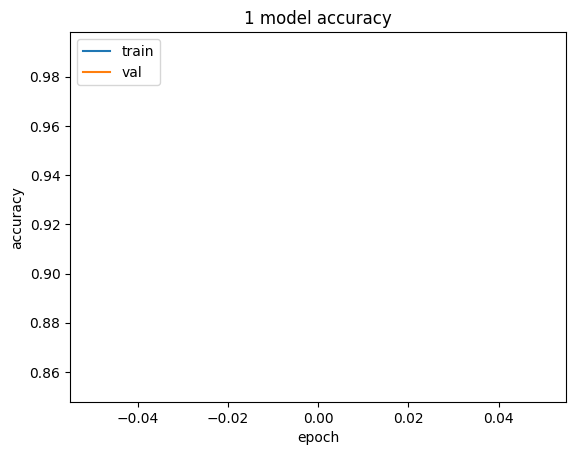

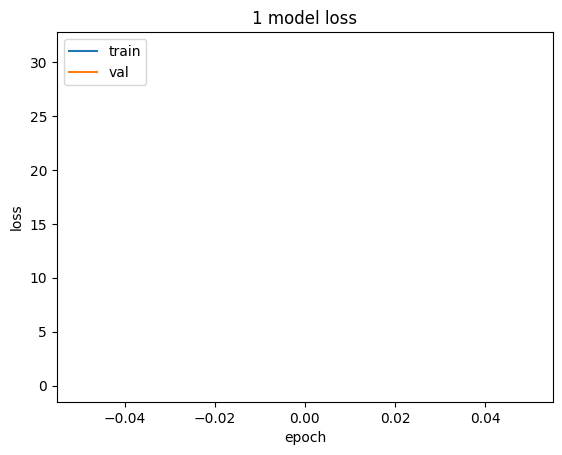

In [ ]:
from matplotlib import pyplot as plt

# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('1 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('1 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/pobert_fast2.zip /content/pobert_fast2
!zip -r /content/pobert_fast2_weights.zip /content/pobert_fast2_weights

  adding: content/pobert_fast2/ (stored 0%)
  adding: content/pobert_fast2/keras_metadata.pb (deflated 96%)
  adding: content/pobert_fast2/fingerprint.pb (stored 0%)
  adding: content/pobert_fast2/variables/ (stored 0%)
  adding: content/pobert_fast2/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/pobert_fast2/variables/variables.index (deflated 79%)
  adding: content/pobert_fast2/assets/ (stored 0%)
  adding: content/pobert_fast2/saved_model.pb (deflated 92%)
  adding: content/pobert_fast2_weights/ (stored 0%)
  adding: content/pobert_fast2_weights/trained_ckpt.data-00000-of-00001 (deflated 19%)
  adding: content/pobert_fast2_weights/checkpoint (deflated 40%)
  adding: content/pobert_fast2_weights/trained_ckpt.index (deflated 80%)


# Test model

In [ ]:
pobert_fast2_model = tf.keras.models.load_model('/content/pobert_fast2')


In [ ]:
pobert_fast2_model.load_weights('/content/pobert_fast2_weights/trained_ckpt')

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

classes = ['Music', 'Photos', 'Books', 'Films']

In [ ]:
X = df.drop(columns = ['id', 'class', 'group_id', 'group_activity', 'group_description', 'group_status', 'post_text', 'bert_input'])
X = X.drop(X.columns[0], axis=1)
x = X
x = np.asarray(x).astype('float32')


In [ ]:
# 515, 2900, 4114

numeric_df = X.head(1).astype('float32')
numeric_df
numeric_input = numeric_df

# numeric_input = numeric_input.apply(pd.to_numeric)
# numeric_input
# numeric_input.info()


# numeric_df = X.iloc[21]

# numeric_input = tf.convert_to_tensor(numeric_df, dtype=tf.float32)
# numeric_input = numeric_df.to_frame()
# numeric_input.info

# numeric_input = numeric_df.to_numpy().astype(np.float32)


In [ ]:
text_input = df['bert_input'][1]
text_input

'МузыкантTory Lanez — канадский рэпер, певец, автор песен, продюсер, режиссер и дизайнер.nannan'

In [ ]:
numeric_input.shape

(1, 14)

In [ ]:
def prepare_input(numeric_input, input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=512,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': token.input_ids,
        'attention_mask': token.attention_mask,
        'numeric_inputs': numeric_input
    }


In [ ]:
pobert_input = prepare_input(numeric_input, text_input, tokenizer)
# merged_input = merge_input(numeric_input, bert_input)
# merged_input

In [ ]:
pobert_input['input_ids'].shape, pobert_input['attention_mask'].shape, pobert_input['numeric_inputs'].shape

(TensorShape([1, 512]), TensorShape([1, 512]), (1, 14))

In [ ]:
probs = pobert_model.predict(pobert_input)[0]
classes[np.argmax(probs)]

1/1 [==============================] - 0s 99ms/step


'Music'

In [ ]:
series = X.iloc[3242]
frame = series.to_frame().transpose()

numeric_df2 = frame.astype('float32')
numeric_input2 = numeric_df2

# numeric_df2 = X.iloc(0)
# .astype('float32')

# numeric_input2 = numeric_df2


In [ ]:
text_input2 = df['bert_input'][3242]
text_input2

'Фото- и видеосъёмкаВ группе вы найдете красивые работы фотографов для вдохновения, альбомы с идеями и видеоуроки.Правила публикации работ! https://vk.com/topic-57409266_32643069Фотограф: Ольга Носкова'

In [ ]:
pobert_input = prepare_input(numeric_input2, text_input2, tokenizer)
pobert_input

{'input_ids': <tf.Tensor: shape=(1, 512), dtype=int32, numpy=
 array([[  101,   467, 16948, 28404, 16948,   118,   483,   477, 17424,
         28396, 19692, 16948, 28403, 28412, 28417, 28401, 28399, 10286,
         28368,   478, 20442, 28405, 28402, 28402, 19692,   477, 28413,
           488, 10286, 17106, 28396, 19692, 28404, 19692,   485, 20442,
         10286, 28403, 17424, 28394, 28413, 19692,   491, 10286, 28393,
         16948, 28404, 28413,   495, 16948, 28404, 16948, 28395, 20442,
         10286, 28406, 24625,   479, 28400, 14800,   477, 28396, 16948,
         28407, 17127, 24625, 19692, 17127, 17424, 14800,   117,   475,
         28400, 28414, 28393, 16948, 28401, 28413,   492,   483, 28396,
         19692, 14800, 28401, 17424,   483,   477, 17424, 28396, 19692,
         16948, 28405, 20442, 16948, 28399, 17424,   119,   462, 20442,
         10286, 28394, 17424, 28400, 10286,   490, 28405, 28393, 28400,
         17424, 28399, 10286, 28408, 17424, 17424,   491, 10286, 28393,
  

In [ ]:
probs = pobert_fast2_model.predict(pobert_input)[0]
classes[np.argmax(probs)]

1/1 [==============================] - 0s 104ms/step


'Photos'